In [1]:
#Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dependencies
import pandas as pd
import numpy as np
from numpy import nan

import csv
import nltk
import pickle

In [239]:
cleaned_df = pd.read_csv('df_final.csv')

In [6]:
X = cleaned_df
y = cleaned_df.pop('y')

# Articles:
- https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1

In [7]:
#1. Importing Spacy Packages
import spacy
from spacy.lang.en import English
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA

In [8]:
#2. Importing Textblob Packages
from textblob import TextBlob

In [9]:
nlp = spacy.load("en_core_web_lg")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [10]:
text_1 = 'Paris is a nice city'
text_2 = 'London is a large city'

In [13]:
nlp(text_1).similarity(nlp(text_2))

0.8950880279494402

In [ ]:
#try applying this for every tweet's simlarity to the one proceeding it

In [241]:
cleaned_df.text_new[0]

'"@RhettRiley1234: Trump only wins with our votes. we must grow Trump nation and do our part. vote. This is our time.'

In [242]:
cleaned_df.text_new[0]

'"@RhettRiley1234: Trump only wins with our votes. we must grow Trump nation and do our part. vote. This is our time.'

In [35]:
cleaned_df[cleaned_df.lemmed_titles.str.startswith(r'https')] #Checking there are 
# None remaining

,level_0,text_new,sustained_vol,VOL_y,volume_0_y_x,volume_0_y_y,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_23,text_lower,processed_title,tokenised_title,stemmed_titles,lemmed_titles


In [243]:
cleaned_df.head()

,level_0,text_new,y,sustained_vol,VOL_y,volume_0_y_x,volume_0_y_y,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_23,text_lower,processed_title,tokenised_title,stemmed_titles,lemmed_titles
0,2016-01-04 03:42:00,"""@RhettRiley1234: Trump only wins with our vot...",0.0,0.603253,1617.917216,44.039403,256.940111,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@rhettriley1234: trump only wins with our vot...",@rhettriley1234 trump wins votes grow trump na...,"[@rhettriley1234, trump, wins, votes, grow, tr...","[@rhettriley1234, trump, wins, votes, grow, tr...","['@rhettriley1234', 'trump', 'win', 'vote', 'g..."
1,2016-01-04 09:31:00,"I look forward to being in Lowell, Massachuset...",0.0,-0.042494,1617.917216,14.931938,140.164699,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"i look forward to being in lowell, massachuset...",look forward lowell massachusetts today hear b...,"[look, forward, lowell, massachusetts, today, ...","[look, forward, lowell, massachusetts, today, ...","['look', 'forward', 'lowell', 'massachusett', ..."
2,2016-01-04 12:00:00,"Woody Johnson, owner of the NYJets, is @JebBus...",0.0,0.387911,1617.917216,24.466995,84.908412,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"woody johnson, owner of the nyjets, is @jebbus...",woody johnson owner nyjets finance chairman wo...,"[woody, johnson, owner, nyjets, finance, chair...","[woody, johnson, owner, nyjets, finance, chair...","['woody', 'johnson', 'owner', 'nyjet', 'financ..."
3,2016-01-04 18:20:00,"The rally in Lowell, Massachusetts, was amazin...",0.0,-0.226015,1617.917216,14.439084,46.403724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"the rally in lowell, massachusetts, was amazin...",rally lowell massachusetts amazing people goin...,"[rally, lowell, massachusetts, amazing, people...","[rally, lowell, massachusetts, amazing, people...","['rally', 'lowell', 'massachusett', 'amazing',..."
4,2016-01-04 18:22:00,"""@troyconway: Now 2-more IT Firms going over s...",0.0,1.147005,1617.917216,14.439084,46.403724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"""@troyconway: now 2-more it firms going over s...",firms going seas huge difference global econom...,"[firms, going, seas, huge, difference, global,...","[firms, going, seas, huge, difference, global,...","['firm', 'go', 'sea', 'huge', 'difference', 'g..."


In [244]:
cleaned_df.index=cleaned_df.level_0

In [246]:
cleaned_df.drop(columns='level_0', inplace=True)

In [247]:
cleaned_df.reset_index(inplace=True)

In [75]:
cleaned_df.lemmed_titles[165]

"['@americanaspie', 'remember', 'glenn', 'give', 'gift', 'illegal', 'alien', 'cross', 'border']"

In [77]:
nlp(cleaned_df.lemmed_titles[164]).similarity(nlp(cleaned_df.lemmed_titles[165]))

0.9739117777049742

In [86]:
cleaned_df.shape

(9441, 33)

In [248]:
similarity_scores = []
for i in range(0, cleaned_df.shape[0]-1): # Similarity on the lemmed text
        similarity_scores.append(nlp(cleaned_df.lemmed_titles[i]).similarity(nlp(cleaned_df.lemmed_titles[i+1])))

In [249]:
similarity_scores.append(0)

In [250]:
similarity_scores_full = []
for i in range(0, cleaned_df.shape[0]-1): # Similarity on the overall text 
        similarity_scores_full.append(nlp(cleaned_df.text_new[i]).similarity(nlp(cleaned_df.text_new[i+1])))

/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


In [251]:
similarity_scores_full.append(0)

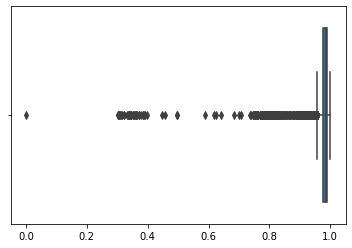

In [254]:
sns.boxplot(similarity_scores) #trying to look at the general distribution and outliers

In [256]:
np.std(similarity_scores)

0.04943068158357508

In [257]:
np.std(similarity_scores_full) #Greater dissimilariy in the overall text so inclined
# to use this as a potential explanatory variable

0.14987854390534378

In [347]:
len(similarity_scores_full)

10662

In [100]:
def tokenize_and_parse(cell): #Second functiom to lemmatize and entity tag
    my_doc = nlp(cell)
    text_blob = TextBlob(cell)
    token_list = []
    token_lemma = []
    pos_tagging =[]
    entity_list = {}
    
    for word in my_doc:
        if word.is_stop==False:
            token_list.append(word.text)
            token_lemma.append(word.lemma_)
            pos_tagging.append(word.pos_)
            
        else:
            pass
        
    # Entity Recognition
    for ent in my_doc.ents:
        entity_list[ent.text] = [ent.label_, ent.start_char, ent.end_char]
        
    sentiment_polarity = text_blob.sentiment[0] 
    sentiment_subjectivity = text_blob.sentiment[1]
        
    return (token_list, token_lemma, pos_tagging, entity_list, sentiment_polarity, sentiment_subjectivity)

In [154]:
cleaned_df.text_new[16]

'"@Lucky5713 @NewDay What\'s wrong with showing Morocco? Nothing! It illustrates a Point! Duh! Love the video!"'

In [162]:
cleaned_df[cleaned_df.lemmed_titles.str.contains(r'hillary')]

,level_0,text_new,sustained_vol,VOL_y,volume_0_y_x,volume_0_y_y,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_23,text_lower,processed_title,tokenised_title,stemmed_titles,lemmed_titles,similarity_scores
92,2016-01-12 21:46:00,Numerous polls have me beating Hillary Clinton...,0.975684,1772.273993,49.505947,236.840194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,numerous polls have me beating hillary clinton...,numerous polls beating hillary race voter turn...,"[numerous, polls, beating, hillary, race, vote...","[numerous, polls, beating, hillary, race, vote...","['numerous', 'poll', 'beat', 'hillary', 'race'...",0.974205
161,2016-01-21 05:27:00,"""@AnnCoulter: Trump destroyed Hillary &amp; Sa...",-0.161741,1984.465934,25.058811,232.579022,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@anncoulter: trump destroyed hillary &amp; sa...",trump destroyed hillary amp sanders moved dest...,"[trump, destroyed, hillary, amp, sanders, move...","[trump, destroyed, hillary, amp, sanders, move...","['trump', 'destroy', 'hillary', 'amp', 'sander...",0.984691
167,2016-01-21 06:19:00,Sad sack @JebBush has just done another ad on ...,0.256860,1984.465934,22.854272,172.769420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sad sack @jebbush has just done another ad on ...,sad sack ad special interest money saying beat...,"[sad, sack, ad, special, interest, money, sayi...","[sad, sack, ad, special, interest, money, sayi...","['sad', 'sack', 'ad', 'special', 'interest', '...",0.987137
175,2016-01-21 16:54:00,"Why does @Greta have a fired Bushy like dummy,...",-1.353045,1984.465934,11.770154,39.909366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"why does @greta have a fired bushy like dummy,...",fired bushy dummy sununu on- spewing false inf...,"[fired, bushy, dummy, sununu, on-, spewing, fa...","[fired, bushy, dummy, sununu, on-, spewing, fa...","['fire', 'bushy', 'dummy', 'sununu', 'on-', 's...",0.982554
195,2016-01-22 12:47:00,The dying @NRO National Review has totally giv...,0.400499,1600.143185,18.181565,84.908412,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,the dying @nro national review has totally giv...,dying @nro national review totally given fight...,"[dying, @nro, national, review, totally, given...","[dying, @nro, national, review, totally, given...","['die', '@nro', 'national', 'review', 'totally...",0.976321
318,2016-01-29 15:51:00,The new e-mail release is a disaster for Hilla...,1.515398,1823.774119,7.690200,24.518179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,the new e-mail release is a disaster for hilla...,new e mail release disaster hillary minimum ba...,"[new, e, mail, release, disaster, hillary, min...","[new, e, mail, release, disaster, hillary, min...","['new', 'e', 'mail', 'release', 'disaster', 'h...",0.990489
463,2016-02-15 04:24:00,Jeb Bush and Ted Cruz are not electable presid...,2.440743,298.339474,42.237666,264.133006,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,jeb bush and ted cruz are not electable presid...,jeb bush ted cruz electable presidential candi...,"[jeb, bush, ted, cruz, electable, presidential...","[jeb, bush, ted, cruz, electable, presidential...","['jeb', 'bush', 'ted', 'cruz', 'electable', 'p...",0.979681
479,2016-02-16 19:04:00,"Explain to @brithume and @megynkelly, who know...",1.384926,1204.531868,12.159456,33.345134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"explain to @brithume and @megynkelly, who know...",explain know beat hillary win states dem indie...,"[explain, know, beat, hillary, win, states, de...","[explain, know, beat, hillary, win, states, de...","['explain', 'know', 'beat', 'hillary', 'win', ...",0.989549
489,2016-02-17 06:40:00,"I will beat Hillary easily, but Lindsey Graham...",-0.017849,1343.914286,71.617972,172.769420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"i will beat hillary easily, but lindsey graham...",beat hillary easily lindsey graham says got me...,"[bea

In [258]:
awesome_3 = cleaned_df['text_new'].apply(tokenize_and_parse)

In [102]:
awesome = cleaned_df['text_lower'].apply(tokenize_and_parse)

In [103]:
awesome_2 = cleaned_df['lemmed_titles'].apply(tokenize_and_parse)

In [259]:
len(awesome_3)

10662

## Adding Entities

In [263]:
cleaned_df['Entities'] = dicts

In [264]:
cleaned_df

,level_0,text_new,y,sustained_vol,VOL_y,volume_0_y_x,volume_0_y_y,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_23,text_lower,processed_title,tokenised_title,stemmed_titles,lemmed_titles,Entities
0,2016-01-04 03:42:00,"""@RhettRiley1234: Trump only wins with our vot...",0.0,0.603253,1617.917216,44.039403,256.940111,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@rhettriley1234: trump only wins with our vot...",@rhettriley1234 trump wins votes grow trump na...,"[@rhettriley1234, trump, wins, votes, grow, tr...","[@rhettriley1234, trump, wins, votes, grow, tr...","['@rhettriley1234', 'trump', 'win', 'vote', 'g...",{'ORG': 1}
1,2016-01-04 09:31:00,"I look forward to being in Lowell, Massachuset...",0.0,-0.042494,1617.917216,14.931938,140.164699,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"i look forward to being in lowell, massachuset...",look forward lowell massachusetts today hear b...,"[look, forward, lowell, massachusetts, today, ...","[look, forward, lowell, massachusetts, today, ...","['look', 'forward', 'lowell', 'massachusett', ...","{'GPE': 2, 'DATE': 1}"
2,2016-01-04 12:00:00,"Woody Johnson, owner of the NYJets, is @JebBus...",0.0,0.387911,1617.917216,24.466995,84.908412,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"woody johnson, owner of the nyjets, is @jebbus...",woody johnson owner nyjets finance chairman wo...,"[woody, johnson, owner, nyjets, finance, chair...","[woody, johnson, owner, nyjets, finance, chair...","['woody', 'johnson', 'owner', 'nyjet', 'financ...","{'PERSON': 2, 'ORG': 2}"
3,2016-01-04 18:20:00,"The rally in Lowell, Massachusetts, was amazin...",0.0,-0.226015,1617.917216,14.439084,46.403724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"the rally in lowell, massachusetts, was amazin...",rally lowell massachusetts amazing people goin...,"[rally, lowell, massachusetts, amazing, people...","[rally, lowell, massachusetts, amazing, people...","['rally', 'lowell', 'massachusett', 'amazing',...","{'GPE': 2, 'CARDINAL': 1}"
4,2016-01-04 18:22:00,"""@troyconway: Now 2-more IT Firms going over s...",0.0,1.147005,1617.917216,14.439084,46.403724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"""@troyconway: now 2-more it firms going over s...",firms going seas huge difference global econom...,"[firms, going, seas, huge, difference, global,...","[firms, going, seas, huge, difference, global,...","['firm', 'go', 'sea', 'huge', 'difference', 'g...",{}
5,2016-01-04 18:28:00,"""@thecybermenace: @realDonaldTrump Donald Trum...",0.0,1.774614,1617.917216,14.439084,46.403724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"""@thecybermenace: @realdonaldtrump donald trum...",@thecybermenace donald trump hit ballpark lowe...,"[@thecybermenace, donald, trump, hit, ballpark...","[@thecybermenace, donald, trump, hit, ballpark...","['@thecybermenace', 'donald', 'trump', 'hit', ...","{'PERSON': 1, 'CARDINAL': 1, 'GPE': 1, 'TIME': 1}"
6,2016-01-04 19:33:00,"""@samuelghaddad: Wow! Let's hear it for the Fa...",0.0,0.379711,1617.917216,10.510790,33.345134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"""@samuelghaddad: wow! let's hear it for the fa...",let hear factor let truth known beginning real...,"[let, hear, factor, let, truth, known, beginni...","[let, hear, factor, let, truth, known, beginni...","['let', 'hear', 'factor', 'let', 'truth', 'kno...",{}
7,2016-01-04 19:35:00,"""@Mark98z: @realDonaldTrump Mr. TRUMP this was...",0.0,-0.566265,1617.917216,10.510790,33.345134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"""@mark98z: @realdonaldtrump mr. trump this was...",@mark98z trump best energized date watched,"[@mark98z, trump, best, energized, date, watched]","[@mark98z, trump, best, energized, date, watched]","['@mark98z', 'trump', 'good', 'energized', 'da...","{'PERSON': 1, 'DATE': 1}"
8,2016-01-04 19:36:00,"""@SalRiccobono: @realDonaldTrump @troyconway D...",0.0,-0.312474,1617.917216,10.510790,33.345134,0,0,0,0,0,0,0,0

In [265]:
v = DictVectorizer(sparse=True)

In [266]:
X = v.fit_transform(cleaned_df['Entities'])

In [267]:
X.shape

(10662, 18)

In [268]:
test = pd.DataFrame(X.toarray(), columns = v.get_feature_names())

In [269]:
test # to test the output of recognisable entities

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
### The Sentiment Polarity Score
sentiment_polarity_score = awesome_3.map(lambda x: x[4])

In [271]:
sentiment_polarity_score

0        0.150000
1        0.187500
2       -0.375000
3        0.566667
4        0.200000
           ...   
10657    0.014660
10658   -0.033333
10659    0.000000
10660   -0.175000
10661   -0.116667
Name: text_new, Length: 10662, dtype: float64

In [272]:
### The Sentiment Subjectivity Score
subjectivity_score = awesome_3.map(lambda x: x[5])

In [273]:
subjectivity_score

0        0.600000
1        0.165000
2        0.400000
3        0.683333
4        0.450000
           ...   
10657    0.693210
10658    0.558333
10659    0.000000
10660    0.373333
10661    0.066667
Name: text_new, Length: 10662, dtype: float64

In [274]:
len(v.get_feature_names())

18

In [275]:
v.get_feature_names() #All possible entities

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

----------------------------------------------------------------------------------------------------------------------------------

In [277]:
# Counter For Different Types of Punctuation 
test['Punctuation'] = awesome_3.map(lambda x: dict(collections.Counter(x[2])))

In [278]:
test['Punctuation'] = awesome_3.map(lambda x: dict(collections.Counter(x[2]))).values

In [279]:
punct_vec = DictVectorizer(sparse=True)

In [281]:
test.shape

(10662, 19)

In [282]:
test = pd.concat([test, pd.DataFrame(punct_vec.fit_transform(test['Punctuation']).toarray()
                              , columns = punct_vec.get_feature_names() )], axis = 1)

In [283]:
test.shape

(10662, 36)

In [284]:
sentiment_polarity_score

0        0.150000
1        0.187500
2       -0.375000
3        0.566667
4        0.200000
           ...   
10657    0.014660
10658   -0.033333
10659    0.000000
10660   -0.175000
10661   -0.116667
Name: text_new, Length: 10662, dtype: float64

In [285]:
sentiment = pd.DataFrame(list(zip(sentiment_polarity_score, subjectivity_score)), 
             columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity_Score']) 

In [286]:
# Adding on Sentiment Scores
final_df = pd.concat([test, sentiment], axis = 1 )

In [287]:
final_df.shape

(10662, 38)

In [320]:
final_df.reset_index(inplace=True)

In [321]:
final_df['text'] = cleaned_df['text_new']

In [314]:
cleaned_df.text_new

0        "@RhettRiley1234: Trump only wins with our vot...
1        I look forward to being in Lowell, Massachuset...
2        Woody Johnson, owner of the NYJets, is @JebBus...
3        The rally in Lowell, Massachusetts, was amazin...
4        "@troyconway: Now 2-more IT Firms going over s...
                               ...                        
10657    Corrupt Congressman Adam Schiff is angry that ...
10658    ìBecause the House has already voted against t...
10659    Congressman Michael McCaul, ìSchiffís inquiry ...
10660    Pelosi and Impeachment - There have already be...
10661    Susan Rice, who was a disaster to President Ob...
Name: text_new, Length: 10662, dtype: object

In [317]:
cleaned_df.shape

(10662, 35)

In [324]:
final_df.drop_duplicates(subset=['level_0', 'text'], inplace=True) 
# Duplicates arrise from regular merging so if the tweet has exact same wording and
# Timestamp, this function will remove them.

In [325]:
final_df.shape

(10661, 40)

In [327]:
final_df

,level_0,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,similarity_scores,text
0,2016-01-04 03:42:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,2.0,0.0,0.150000,0.600000,0.886663,"""@RhettRiley1234: Trump only wins with our vot..."
1,2016-01-04 09:31:00,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000,0.906088,"I look forward to being in Lowell, Massachuset..."
2,2016-01-04 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,6.0,0.0,1.0,0.0,0.0,-0.375000,0.400000,0.886104,"Woody Johnson, owner of the NYJets, is @JebBus..."
3,2016-01-04 18:20:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333,0.848054,"The rally in Lowell, Massachusetts, was amazin..."
4,2016-01-04 18:22:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000,0.797511,"""@troyconway: Now 2-more IT Firms going over s..."
5,2016-01-04 18:28:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.832550,"""@thecybermenace: @realDonaldTrump Donald Trum..."
6,2016-01-04 19:33:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,6.0,0.0,0.291667,0.600000,0.946401,"""@samuelghaddad: Wow! Let's hear it for the Fa..."
7,2016-01-04 19:35:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,1.0,0.0,0.666667,0.433333,0.874251,"""@Mark98z: @realDonaldTrump Mr. TRUMP this was..."
8,2016-01-04 19:36:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.266667,0.283333,0.827034,"""@SalRiccobono: @realDonaldTrump @troyconway D..."
9,2016-01-04 19:36:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,2.0,0.400000,0.900000,0.726930,"""@djw11223: @realDonaldTrump The crowd was HUG..."


In [289]:
combine = pd.read_csv('df_combine.csv') #Calling original dataset back in for the merge

In [329]:
final_df.index = final_df.level_0 #Resetting the index

In [330]:
combine.head()

,Unnamed: 0,level_0,y,text_new,china,dollar,tariff,product,continue,farmer,ohio,buy,starve,government,enforcement,form,hand,begin,easy,fantastic,phenomenal,meantime,kevin,kim,kind,officer,quicker,oval,marine,send,faster,wealth,approve,traditional,grant,waiver,school,schumer,better,source,ship
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04 03:42:00,0,2016-01-04 03:42:00,0.0,"""@RhettRiley1234: Trump only wins with our vot...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04 09:31:00,1,2016-01-04 09:31:00,0.0,"I look forward to being in Lowell, Massachuset...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04 12:00:00,2,2016-01-04 12:00:00,0.0,"Woody Johnson, owner of the NYJets, is @JebBus...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04 18:20:00,3,2016-01-04 18:20:00,0.0,"The rally in Lowell, Massachusetts, was amazin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04 18:22:00,4,2016-01-04 18:22:00,0.0,"""@troyconway: Now 2-more IT Firms going over s...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
combine.index = combine.level_0

In [331]:
df_1 = pd.merge(combine, final_df, left_index=True, right_index=True)

In [343]:
df_1.drop_duplicates(subset=['text', 'level_0_x'], inplace=True)

In [346]:
df_1.y.value_counts()

 0.0    10511
-1.0       99
 1.0       51
Name: y, dtype: int64

In [349]:
df_1.reset_index(inplace=True)

In [350]:
similarity_scores_full = []
for i in range(0, df_1.shape[0]-1): # Adding similarity scires to the final dataset
        similarity_scores_full.append(nlp(df_1.text_new[i]).similarity(nlp(df_1.text_new[i+1])))

/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/harryfield/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


In [352]:
similarity_scores_full.append(0) # the final tweet will have nothing to compare to
# so just appended zero (maybe in hindsight i should've appended the mean?)

In [354]:
df_1['similarity_score'] = similarity_scores_full

# Trialing the Entity Recognition

---

In [355]:
money_df = df_1[df_1.MONEY!=0]

In [363]:
money_df.y.value_counts()

 0.0    683
-1.0     10
 1.0      6
Name: y, dtype: int64

In [357]:
gpe_df = df_1[df_1.GPE!=0]

In [364]:
gpe_df.y.value_counts()

 0.0    3872
-1.0      49
 1.0      23
Name: y, dtype: int64

In [362]:
df_1.shape

(10661, 83)

In [366]:
df_1[df_1.PRODUCT !=0].y.value_counts()

 0.0    131
 1.0      2
-1.0      1
Name: y, dtype: int64

In [245]:
final_df[final_df.pct_ch.abs()==1].GPE.value_counts()

0.0    417
1.0     92
2.0     16
3.0      1
Name: GPE, dtype: int64

In [234]:
final_df.PRON.value_counts()

0.0    7496
1.0      74
2.0       1
Name: PRON, dtype: int64

In [138]:
final_df

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,text,pct_ch
2016-01-03 23:18:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,-1.000000,1.000000,the worst thing hillary could do is have her h...,0
2016-01-03 23:19:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,2.0,1.0,0.000000,0.000000,"by the way, hillary &amp; the msm forgot to me...",0
2016-01-04 00:26:00+00:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,3.0,2.0,0.556250,0.500000,"""@icareeguns: this #iowan is voting for @reald...",0
2016-01-04 11:42:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0,0.150000,0.600000,"""@rhettriley1234: trump only wins with our vot...",0
2016-01-04 17:31:00+00:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000,"i look forward to being in lowell, massachuset...",0
2016-01-04 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,2.0,0.0,-0.375000,0.400000,"woody johnson, owner of the nyjets, is @jebbus...",0
2016-01-05 02:20:00+00:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333,"the rally in lowell, massachusetts, was amazin...",0
2016-01-05 02:22:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000,"""@troyconway: now 2-more it firms going over s...",0
2016-01-05 02:28:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.000000,0.000000,"""@thecybermenace: @realdonaldtrump donald trum...",0
2016-01-05 03:33:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,6.0,0.0,0.291667,0.600000,"""@samuelghaddad: wow! let's hear it for the fa...",0


In [386]:
cleaned_df.shape

(10662, 35)

In [233]:
df_1['text_new'] = cleaned_df['text_new']

In [234]:
df_1.head()

,level_0,y,china,dollar,tariff,product,continue,farmer,ohio,buy,starve,government,enforcement,form,hand,begin,easy,fantastic,phenomenal,meantime,kevin,kim,kind,officer,quicker,oval,marine,send,faster,wealth,approve,traditional,grant,waiver,school,schumer,better,source,ship,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,similarity_scores,text_lower
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04 03:42:00,2016-01-04 03:42:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,2.0,0.0,0.150000,0.600000,0.981368,NaN
2016-01-04 09:31:00,2016-01-04 09:31:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000,0.980099,NaN
2016-01-04 12:00:00,2016-01-04 12:00:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,6.0,0.0,1.0,0.0,0.0,-0.375000,0.400000,0.979990,NaN
2016-01-04 18:20:00,2016-01-04 18:20:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333,0.982369,NaN
2016-01-04 18:22:00,2016-01-04 18:22:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000,0.973898,NaN


In [367]:
df_1[df_1.y!=0].describe() 

,Unnamed: 0,y,china,dollar,tariff,product,continue,farmer,ohio,buy,starve,government,enforcement,form,hand,begin,easy,fantastic,phenomenal,meantime,kevin,kim,kind,officer,quicker,oval,marine,send,faster,wealth,approve,traditional,grant,waiver,school,schumer,better,source,ship,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,similarity_scores,similarity_score
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,8670.906667,-0.320000,0.160000,0.160000,0.120000,0.093333,0.060000,0.040000,0.060000,0.046667,0.040000,0.040000,0.046667,0.046667,0.026667,0.060000,0.013333,0.033333,0.013333,0.046667,0.033333,0.020000,0.006667,0.040000,0.006667,0.020000,0.026667,0.026667,0.006667,0.006667,0.033333,0.006667,0.006667,0.006667,0.026667,0.020000,0.006667,0.006667,0.040000,0.166667,0.286667,0.026667,0.080000,0.726667,0.0,0.026667,0.046667,0.160000,0.286667,0.040000,0.906667,0.060000,0.626667,0.020000,0.0,0.086667,0.020000,2.140000,0.033333,0.533333,0.0,0.173333,0.006667,0.060000,4.933333,0.506667,0.006667,0.013333,5.160000,4.453333,0.046667,0.166667,2.946667,0.433333,0.192106,0.489059,0.840981,0.847420
std,2260.226182,0.950591,0.464585,0.645896,0.447514,0.291874,0.238282,0.196616,0.264955,0.211631,0.196616,0.228212,0.211631,0.211631,0.161647,0.238282,0.115082,0.180107,0.115082,0.211631,0.180107,0.140469,0.081650,0.255936,0.081650,0.140469,0.161647,0.198878,0.081650,0.081650,0.243483,0.081650,0.081650,0.081650,0.198878,0.140469,0.081650,0.081650,0.196616,0.439900,0.535162,0.161647,0.272202,0.881553,0.0,0.161647,0.241268,0.531933,0.627520,0.196616,1.107307,0.264955,0.923567,0.140469,0.0,0.305139,0.140469,1.757171,0.180107,0.808235,0.0,0.444907,0.081650,0.238282,3.719469,1.251826,0.081650,0.115082,3.537109,2.526601,0.241268,0.373927,2.009329,0.638966,0.304048,0.267710,0.146453,0.151732
min,5177.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.625000,0.000000,0.132696,0.132696
25%,7372.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000

In [133]:
final_df[final_df.pct_ch!=0].describe() / final_df.describe()

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,pct_ch
count,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476
mean,1.009275,1.014026,0.000000,1.028110,1.048754,0.000000,0.000000,2.321538,1.019011,0.761820,0.874745,1.052462,1.366984,0.963218,0.575741,0.928615,1.057672,0.575741,0.946876,0.950826,0.964575,1.531227,0.548906,1.179798,1.213312,0.987319,1.023113,1.116233,0.946943,1.024544,0.954412,0.928615,0.973399,1.044742,1.072205,0.882681,0.978536,14.393536
std,0.998390,1.010728,0.000000,1.014803,0.989151,0.000000,0.000000,1.520861,1.001794,0.889680,0.917010,0.975049,1.576303,0.990096,0.759982,0.964642,1.011691,0.759982,0.909515,0.954631,0.981183,1.210816,0.767532,1.266392,1.089167,0.925392,1.077751,1.132023,0.961538,0.966007,0.901628,0.959379,1.006094,0.980041,1.023443,0.950599,1.001153,3.615719
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,-inf
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.956938,-inf
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,0.775041,0.995025,inf
max,0.750000,0.600000,0.000000,1.000000,0.750000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.600000,0.500000,0.750000,0.500000,0.666667,1.000000,1.000000,0.857143,0.750000,1.000000,0.500000,0.600000,0.529412,0.777778,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000


In [369]:
df_1.head()

,level_0,Unnamed: 0,level_0_x,y,text_new,china,dollar,tariff,product,continue,farmer,ohio,buy,starve,government,enforcement,form,hand,begin,easy,fantastic,phenomenal,meantime,kevin,kim,kind,officer,quicker,oval,marine,send,faster,wealth,approve,traditional,grant,waiver,school,schumer,better,source,ship,level_0_y,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,similarity_scores,text,similarity_score
0,2016-01-04 03:42:00,0,2016-01-04 03:42:00,0.0,"""@RhettRiley1234: Trump only wins with our vot...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-04 03:42:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,2.0,0.0,0.150000,0.600000,0.886663,"""@RhettRiley1234: Trump only wins with our vot...",0.886663
1,2016-01-04 09:31:00,1,2016-01-04 09:31:00,0.0,"I look forward to being in Lowell, Massachuset...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-04 09:31:00,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000,0.906088,"I look forward to being in Lowell, Massachuset...",0.906088
2,2016-01-04 12:00:00,2,2016-01-04 12:00:00,0.0,"Woody Johnson, owner of the NYJets, is @JebBus...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-04 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,6.0,0.0,1.0,0.0,0.0,-0.375000,0.400000,0.886104,"Woody Johnson, owner of the NYJets, is @JebBus...",0.886104
3,2016-01-04 18:20:00,3,2016-01-04 18:20:00,0.0,"The rally in Lowell, Massachusetts, was amazin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-04 18:20:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333,0.848054,"The rally in Lowell, Massachusetts, was amazin...",0.848054
4,2016-01-04 18:22:00,4,2016-01-04 18:22:00,0.0,"""@troyconway: Now 2-more IT Firms going over s...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-04 18:22:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000,0.797511,"""@troyconway: Now 2-more IT Firms going over s...",0.797511


In [370]:
df_1.index=df_1.level_0

In [371]:
df_1.columns

Index(['level_0', 'Unnamed: 0', 'level_0_x', 'y', 'text_new', 'china',
       'dollar', 'tariff', 'product', 'continue', 'farmer', 'ohio', 'buy',
       'starve', 'government', 'enforcement', 'form', 'hand', 'begin', 'easy',
       'fantastic', 'phenomenal', 'meantime', 'kevin', 'kim', 'kind',
       'officer', 'quicker', 'oval', 'marine', 'send', 'faster', 'wealth',
       'approve', 'traditional', 'grant', 'waiver', 'school', 'schumer',
       'better', 'source', 'ship', 'level_0_y', 'CARDINAL', 'DATE', 'EVENT',
       'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL',
       'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME',
       'WORK_OF_ART', 'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ',
       'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SPACE', 'SYM', 'VERB',
       'X', 'Sentiment_Polarity', 'Sentiment_Subjectivity_Score',
       'similarity_scores', 'text', 'similarity_score'],
      dtype='object')

In [372]:
df_1.drop(columns=['level_0', 'Unnamed: 0', 'level_0_x',\
                   'text_new','level_0_y', 'text', 'similarity_scores'], inplace=True)

In [382]:
df_1.corr()['y'][df_1.corr()['y'].abs()>0.03].index

Index(['y', 'china', 'dollar', 'product', 'continue', 'farmer', 'ohio',
       'starve', 'form', 'phenomenal', 'meantime', 'kevin', 'officer',
       'quicker', 'oval', 'marine', 'send', 'approve', 'traditional', 'waiver',
       'schumer', 'ship'],
      dtype='object')

In [383]:
df_trial_final = df_1[['y', 'china', 'dollar', 'product', 'continue', 'farmer', 'ohio',
       'starve', 'form', 'phenomenal', 'meantime', 'kevin', 'officer',
       'quicker', 'oval', 'marine', 'send', 'approve', 'traditional', 'waiver',
       'schumer', 'ship']]

In [387]:
df_trial_final['text'] = final_df['text']

/Users/harryfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [389]:
df_trial_final

,y,china,dollar,product,continue,farmer,ohio,starve,form,phenomenal,meantime,kevin,officer,quicker,oval,marine,send,approve,traditional,waiver,schumer,ship,text
level_0,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04 03:42:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@RhettRiley1234: Trump only wins with our vot..."
2016-01-04 09:31:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"I look forward to being in Lowell, Massachuset..."
2016-01-04 12:00:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Woody Johnson, owner of the NYJets, is @JebBus..."
2016-01-04 18:20:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"The rally in Lowell, Massachusetts, was amazin..."
2016-01-04 18:22:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@troyconway: Now 2-more IT Firms going over s..."
2016-01-04 18:28:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@thecybermenace: @realDonaldTrump Donald Trum..."
2016-01-04 19:33:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@samuelghaddad: Wow! Let's hear it for the Fa..."
2016-01-04 19:35:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@Mark98z: @realDonaldTrump Mr. TRUMP this was..."
2016-01-04 19:36:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""@SalRiccobono: @realDonaldTrump @troyconway D..."


In [391]:
df_trial_final.to_csv('df_trial_final.csv')

In [ ]:
# NORP, ORG, PERCENT, PERSON, CCONJ, INTJ, PUNCT, LOC, PRODUCT, WORK_OF_ART, AUX, Sentiment_polarity #

In [139]:
df_merge = final_df[['text', 'pct_ch', 'NORP', 'ORG', 'PERCENT', 'PERSON', 'CCONJ', 'INTJ', 'PUNCT', 'LOC', 'PRODUCT',\
          'WORK_OF_ART', 'AUX', 'Sentiment_Polarity']]

In [141]:
binary_words = pd.read_csv('binary_words.csv')

In [146]:
binary_words.index = df_merge.index

In [148]:
binary_words.drop(columns='Unnamed: 0', inplace=True)

In [190]:
binary_words.reset_index(inplace=True)

In [191]:
df_merge.reset_index(inplace=True)

In [187]:
df_merge.loc['2016-01-04 17:31:00+00:00'].text

'i look forward to being in lowell, massachusetts, today. i hear a very big crowd is expected--we will have lots of fun!'

In [175]:
df_merge

,text,pct_ch,NORP,ORG,PERCENT,PERSON,CCONJ,INTJ,PUNCT,LOC,PRODUCT,WORK_OF_ART,AUX,Sentiment_Polarity
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.000000
2016-01-03 23:19:00+00:00,"by the way, hillary &amp; the msm forgot to me...",0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000
2016-01-04 00:26:00+00:00,"""@icareeguns: this #iowan is voting for @reald...",0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.556250
2016-01-04 11:42:00+00:00,"""@rhettriley1234: trump only wins with our vot...",0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.150000
2016-01-04 17:31:00+00:00,"i look forward to being in lowell, massachuset...",0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.187500
2016-01-04 20:00:00+00:00,"woody johnson, owner of the nyjets, is @jebbus...",0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,-0.375000
2016-01-05 02:20:00+00:00,"the rally in lowell, massachusetts, was amazin...",0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.566667
2016-01-05 02:22:00+00:00,"""@troyconway: now 2-more it firms going over s...",0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.200000
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realdonaldtrump donald trum...",0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000
2016-01-05 03:33:00+00:00,"""@samuelghaddad: wow! let's hear it for the fa...",0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.291667


In [172]:
final_merge.loc['2019-08-08 23:12:00+00:00', :].shape

(4, 43)

In [162]:
binary_words.index

DatetimeIndex(['2016-01-03 23:18:00+00:00', '2016-01-03 23:19:00+00:00',
               '2016-01-04 00:26:00+00:00', '2016-01-04 11:42:00+00:00',
               '2016-01-04 17:31:00+00:00', '2016-01-04 20:00:00+00:00',
               '2016-01-05 02:20:00+00:00', '2016-01-05 02:22:00+00:00',
               '2016-01-05 02:28:00+00:00', '2016-01-05 03:33:00+00:00',
               ...
               '2019-08-08 22:19:00+00:00', '2019-08-08 22:19:00+00:00',
               '2019-08-08 23:12:00+00:00', '2019-08-08 23:12:00+00:00',
               '2019-08-08 23:55:00+00:00', '2019-08-09 12:03:00+00:00',
               '2019-08-09 12:03:00+00:00', '2019-08-09 18:44:00+00:00',
               '2019-08-09 18:44:00+00:00', '2019-08-12 04:01:00+00:00'],
              dtype='datetime64[ns, UTC]', length=7571, freq=None)

In [192]:
final_merge = pd.merge(df_merge, binary_words, left_index=True, right_index=True, how='left')

In [173]:
final_merge.drop_duplicates(inplace=True)

In [195]:
final_merge.index = final_merge.index_x

In [198]:
final_merge.drop(columns='index_x', inplace=True)

In [199]:
final_merge.to_csv('final_merge.csv')

In [124]:
def correlation_heat_map(df):
    corrs = df.corr()
    corrs = df.corr()[(df.corr() < 1.0) & (df.corr() > 0.1) | (df.corr() < -0.1)].dropna(how='all')
    fig, ax = plt.subplots(figsize=(20, 9))
    ax = sns.heatmap(corrs, annot=True, cmap='coolwarm')

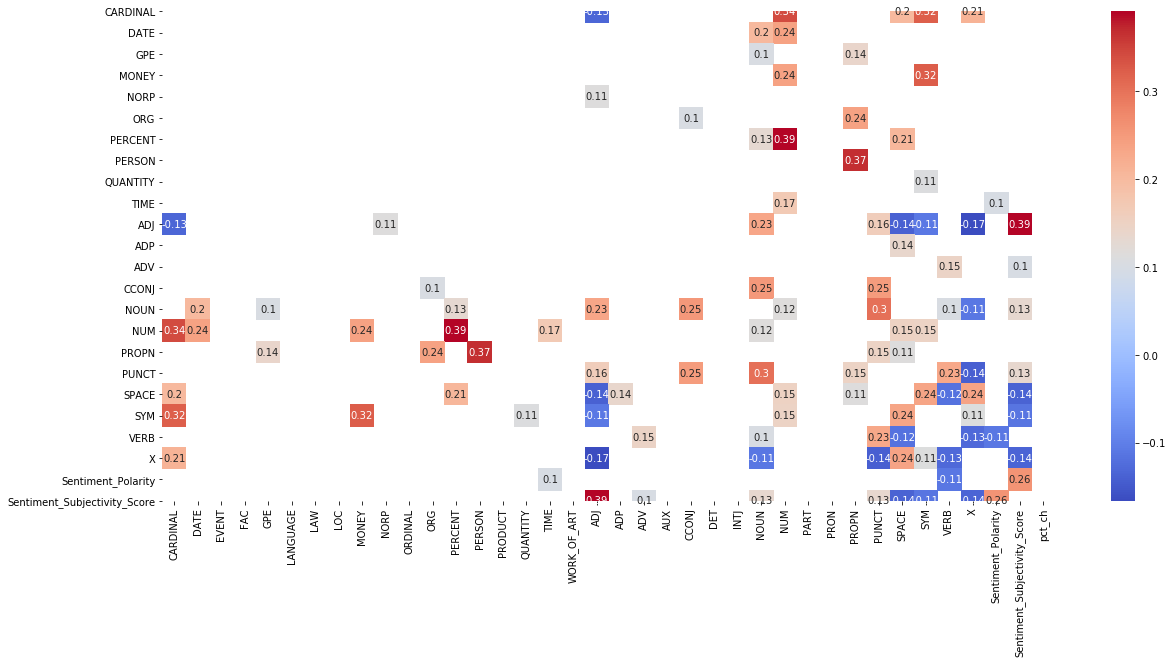

In [127]:
correlation_heat_map(final_df)

----------------------------------------------------------------------------------------------------------------------------------